# 0. Read, Inspect, Preprocess and Split Data

In [103]:
import pandas as pd

In [104]:
basePath = "/home/phuonglh/vlp/s2s/dat/"

In [105]:
pathY = f"{basePath}y.80-19.tsv"

In [106]:
dfY = pd.read_csv(pathY, delimiter="\t", header=None)

/home/phuonglh/miniconda3/envs/BDL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,27,29,30,31,33,34,35,36,37,38,39,40,42,44,45,47,48,51,52,54,55,57,58,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,90,91,92,93,94,96,97,99,100,103,104,105,106,108,110,112,113,114,115,116,117,119,120,121,123,124,125,127,128,129,130,133,135,138,139,140,141,143,144,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [107]:
# dfY.loc[dfY[3] == '-'] # search for an anomaly line

In [108]:
dfY['MuongTe'] = pd.to_numeric(dfY.loc[:,3])
dfY['Date'] = dfY.loc[:, 0:2].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dfY['Date'] = pd.to_datetime(dfY['Date'])

In [109]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,MuongTe,Date
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,...,0.3,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,...,0.0,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,...,0.0,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30


In [110]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precipitation')

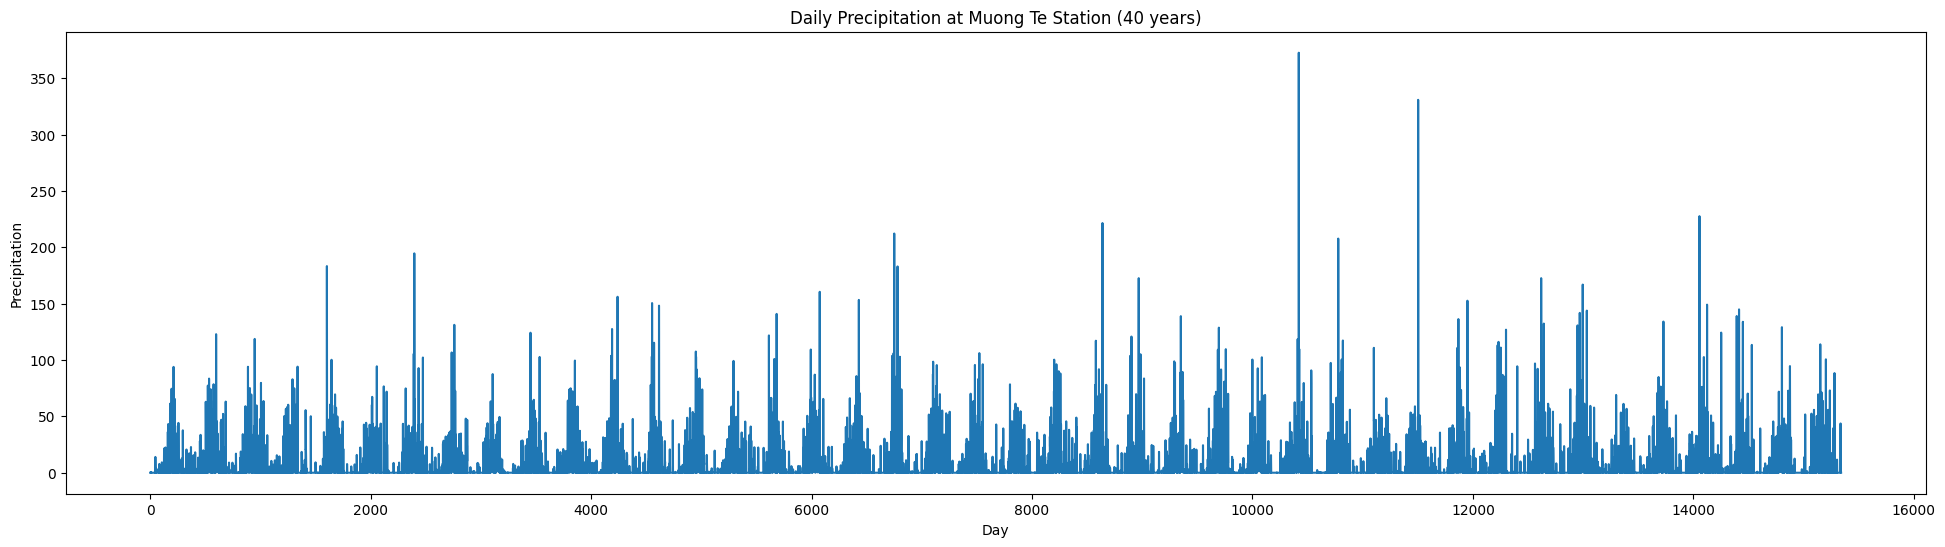

In [111]:
plt.figure(figsize=(24,6))
plt.plot(dfY['MuongTe'])
plt.title('Daily Precipitation at Muong Te Station (40 years)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

In [112]:
def isExtreme(value):
    if value >= 0.9:
        return 1
    else:
        return 0

In [113]:
dfRank = dfY['MuongTe'].rank(pct=True)

In [114]:
dfRank

0        0.281794
1        0.281794
2        0.281794
3        0.281794
4        0.281794
           ...   
15336    0.714491
15337    0.573072
15338    0.281794
15339    0.281794
15340    0.281794
Name: MuongTe, Length: 15341, dtype: float64

In [115]:
y = dfRank.apply(lambda v: isExtreme(v))

In [116]:
dfY['y'] = y

In [117]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,MuongTe,Date,y
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01,0
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02,0
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03,0
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04,0
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,...,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27,0
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,...,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28,0
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,...,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29,0
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,...,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30,0


In [118]:
sum(y)

1533

In [119]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [120]:
featurePaths = [f"{basePath}{f}.80-19.csv" for f in ["geo", "hum", "slp", "ssm", "uvw"]]

In [121]:
print(featurePaths)

['/home/phuonglh/vlp/s2s/dat/geo.80-19.csv', '/home/phuonglh/vlp/s2s/dat/hum.80-19.csv', '/home/phuonglh/vlp/s2s/dat/slp.80-19.csv', '/home/phuonglh/vlp/s2s/dat/ssm.80-19.csv', '/home/phuonglh/vlp/s2s/dat/uvw.80-19.csv']


In [122]:
dfs = [pd.read_csv(path) for path in featurePaths]

In [123]:
df = pd.concat(dfs, axis=1)

In [124]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010
...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000


In [125]:
df['Date'] = dfY['Date']
df['y'] = dfY['y']

In [126]:
features = list(df.columns.values)[0:-2] # remove the last two columns which are not the main features ('Date' and 'y')

In [127]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008,1980-01-01,0
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010,1980-01-02,0
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007,1980-01-03,0
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010,1980-01-04,0
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000,2019-12-27,0
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002,2019-12-28,1
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000,2019-12-29,0
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000,2019-12-30,0


In [128]:
train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='y', extra_feature_col=features, with_split=True, val_ratio=0.1, test_ratio=0.1)

In [129]:
valid.df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y,id
11688,1521.00,5863.25,83.250015,87.500015,28.750004,101705.0,0.35800,-0.049988,3.575008,21.300014,1.600010,2012-01-01,0,0
11689,1504.50,5835.50,84.250015,88.000015,28.250000,101453.0,0.35750,2.100010,3.875011,27.425010,11.950008,2012-01-02,0,0
11690,1510.50,5804.75,92.250015,93.000015,50.500010,101418.0,0.35650,0.350010,3.700012,41.775005,23.400010,2012-01-03,0,0
11691,1523.75,5786.25,98.000015,99.000015,36.250004,101810.0,0.35730,-0.974991,3.150009,52.250008,16.550010,2012-01-04,0,0
11692,1514.75,5787.75,96.250015,98.250015,12.000000,101750.0,0.35750,2.975010,4.275009,48.725006,11.750011,2012-01-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,1544.00,5852.25,96.750000,96.750000,11.250000,101937.5,0.35625,2.175001,2.600002,45.525000,-6.575000,2015-12-27,0,0
13145,1552.25,5861.75,96.250000,96.250000,10.250000,102015.0,0.35700,0.200002,5.000000,41.400000,-15.325000,2015-12-28,0,0
13146,1553.00,5846.75,96.250000,95.750000,8.750000,102050.0,0.35700,-1.774998,3.000001,41.075000,-6.475000,2015-12-29,0,0
13147,1557.75,5851.25,95.250000,96.000000,5.000000,102185.0,0.35675,-2.774999,2.450002,41.725000,8.500000,2015-12-30,0,0


# 1. TCN Forecast

In [130]:
lookback, horizon = 7, 7

In [131]:
scaler = StandardScaler()
for data in [train, valid, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [132]:
X, y = train.to_numpy()
X.shape, y.shape

((11675, 7, 19), (11675, 7, 1))

In [133]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster

In [134]:
from torch import nn

In [135]:
import torch

In [136]:
extreme_weight = torch.full([1], 9.0) # make the extreme sample a large weight
loss = nn.BCEWithLogitsLoss(pos_weight=extreme_weight)

In [137]:
model = TCNForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], optimizer='Adam', loss=loss, lr=1e-5)

Global seed set to 547676994
Global seed set to 547676994


In [138]:
model.fit((X, y), batch_size=32, epochs=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params
--------------------------------------------
0 | model | NormalizeTSModel  | 5.5 K 
1 | loss  | BCEWithLogitsLoss | 0     
--------------------------------------------
5.5 K     Trainable params
0         Non-trainable params
5.5 K     Total params
0.022     Total estimated model params size (MB)


Epoch 9: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [00:02<00:00, 172.06it/s, loss=-0.769]


In [139]:
X_valid, y_valid = valid.to_numpy()

In [140]:
model.evaluate((X_valid, y_valid))

[array([[2.31714177],
        [2.74825549],
        [3.34361815],
        [2.60392666],
        [2.4490943 ],
        [2.90806246],
        [2.59631467]])]

In [141]:
p_valid_tcn = model.predict(X_valid)

In [142]:
p_valid_tcn

array([[[-1.5901554],
        [-1.6888657],
        [-2.1787672],
        ...,
        [-1.5366367],
        [-1.9403827],
        [-1.662899 ]],

       [[-2.0003843],
        [-2.0100517],
        [-2.6007936],
        ...,
        [-1.9766508],
        [-2.2734003],
        [-2.0491016]],

       [[-1.8751516],
        [-1.9084203],
        [-2.4895706],
        ...,
        [-1.8295565],
        [-2.177303 ],
        [-1.9208329]],

       ...,

       [[-1.7478606],
        [-1.8007429],
        [-2.3477025],
        ...,
        [-1.6752853],
        [-2.047608 ],
        [-1.7750518]],

       [[-1.8840402],
        [-1.8908677],
        [-2.5251758],
        ...,
        [-1.8230255],
        [-2.155995 ],
        [-1.871205 ]],

       [[-1.8050385],
        [-1.8326195],
        [-2.4459732],
        ...,
        [-1.7372309],
        [-2.068981 ],
        [-1.7765524]]], dtype=float32)

In [143]:
y_valid

array([[[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [-0.33273092],
        [-0.33273092],
        [ 3.0054314 ]],

       [[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [-0.33273092],
        [ 3.0054314 ],
        [-0.33273092]],

       [[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [ 3.0054314 ],
        [-0.33273092],
        [-0.33273092]],

       ...,

       [[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [-0.33273092],
        [-0.33273092],
        [-0.33273092]],

       [[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [-0.33273092],
        [-0.33273092],
        [-0.33273092]],

       [[-0.33273092],
        [-0.33273092],
        [-0.33273092],
        ...,
        [-0.33273092],
        [-0.33273092],
        [-0.33273092]]], dtype=float32)

In [144]:
p_valid_tcn[:,:,0][:,-1]

array([-1.662899 , -2.0491016, -1.9208329, ..., -1.7750518, -1.871205 ,
       -1.7765524], dtype=float32)

In [145]:
y_valid[:,:,0][:,-1]

array([ 3.0054314 , -0.33273092, -0.33273092, ..., -0.33273092,
       -0.33273092, -0.33273092], dtype=float32)

Text(0, 0.5, 'Extreme')

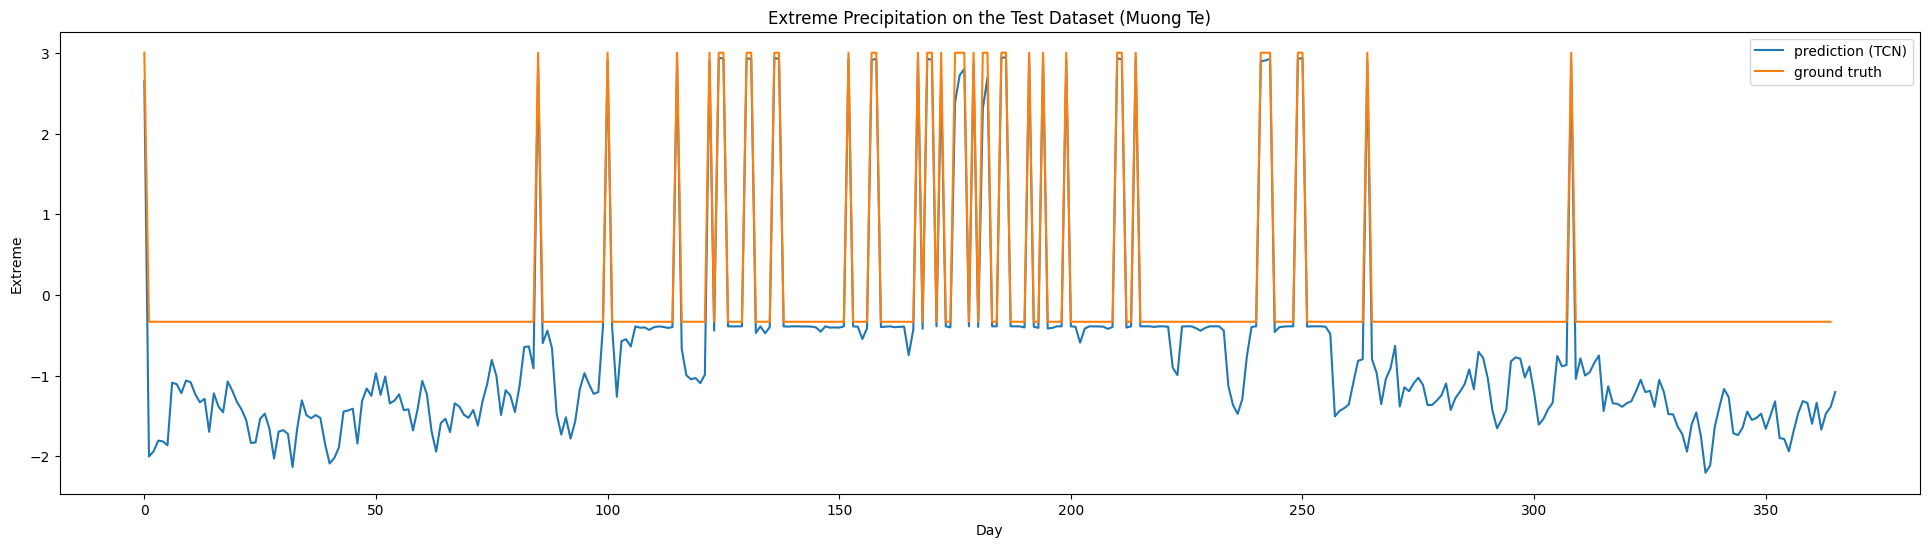

In [146]:
plt.figure(figsize=(24,6))
plt.plot(p_valid_tcn[:,:,0][:,-1][horizon:horizon+366]) # shift horizon time steps
plt.plot(y_valid[:,:,0][:,-1][0:365]) 
plt.legend(["prediction (TCN)", "ground truth"])
plt.title('Extreme Precipitation on the Test Dataset (Muong Te)')
plt.xlabel('Day')
plt.ylabel('Extreme')

In [147]:
import numpy as np

In [148]:
def classify(p, epsilon=0.5):
    score = 1 / (1 + np.exp(-p))
    if score >= epsilon:
        return 1.0
    else:
        return 0.0

In [149]:
y_v = valid.unscale_numpy(y_valid)[:,:,0][:,-1][:-horizon]

In [157]:
sum(y_v)

149.0

In [151]:
z_v_tcn = [classify(p) for p in p_valid_tcn[:,:,0][:,-1]][horizon:]

In [156]:
sum(z_v_tcn)

149.0

In [153]:
import sklearn
import sklearn.metrics

In [154]:
# AUC score
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_v, z_v_tcn)
sklearn.metrics.auc(fpr, tpr)

1.0

In [155]:
print(sklearn.metrics.classification_report(y_v, z_v_tcn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1292
         1.0       1.00      1.00      1.00       149

    accuracy                           1.00      1441
   macro avg       1.00      1.00      1.00      1441
weighted avg       1.00      1.00      1.00      1441

